In [57]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [58]:
with open ('review_sentiment_score_updated.csv', 'r') as review:
    df = pd.read_csv(review, index_col='index')
    df = df.drop(['Unnamed: 0'], axis=1)

In [59]:
for i in range(len(df)):
    df.loc[i,'avg_sentiment'] = df.iloc[i,3:9].mean()

In [60]:
for i in range(len(df)):
    df.loc[i,'avg_pos'] = df.loc[i,['vader_pos', 'senticnet_pos', 'pattern_pos']].mean()
    df.loc[i,'avg_neg'] = df.loc[i,['vader_neg', 'senticnet_neg', 'pattern_neg']].mean()
    df.loc[i,'avg_sentiment'] = df.iloc[i,3:9].mean()

In [145]:
for i in range(len(df.index)):
    rate = df.loc[i,'rate']
    # movie_class:
    # 1: poor
    # 2: below average
    # 3: average
    # 4: above average
    # 5: excellent
    if rate == 1 or rate == 2:
        df.loc[i, 'movie_classes'] = 1
    elif rate == 3 or rate == 4:
        df.loc[i, 'movie_classes'] = 2
    elif rate == 5 or rate == 6:
        df.loc[i, 'movie_classes'] = 3
    elif rate == 7 or rate == 8:
        df.loc[i, 'movie_classes'] = 4
    elif rate == 9 or rate == 10:
        df.loc[i, 'movie_classes'] = 5
#     if rate == 1 or rate == 2 or rate == 3:
#         df.loc[i, 'movie_classes'] = 1
#     elif rate == 4 or rate == 5 or rate == 6:
#         df.loc[i, 'movie_classes'] = 2
#     elif rate == 7 or rate == 8 or rate == 9 or rate ==10:
#         df.loc[i, 'movie_classes'] = 3

In [62]:
np.random.seed(23)

In [146]:
# remove some outliers that using many negative words but the rate is very positive
# those points would have serious influence on the prediction model.
for i in range(len(df.index)):
    pos = df.loc[i,'avg_pos']
    sentiment = df.loc[i,'avg_sentiment']
    rate = df.loc[i,'rate']
    if sentiment < 0 and rate >5:
        df.loc[i, 'classes'] = 'noneed'
    elif pos < 0.25 and rate >5:
        df.loc[i, 'classes'] = 'noneed'
    elif sentiment > 0 and rate <5:
        df.loc[i, 'classes'] = 'noneed'
    elif sentiment > 0.1 and rate ==1:
        df.loc[i, 'classes'] = 'noneed'
#     elif rate == 1 and np.random.binomial(2, 0.3):
#         df.loc[i, 'classes'] = 'noneed'
    else:
        df.loc[i, 'classes'] = 'keep'

df_no_outlier = df[df.classes == 'keep']

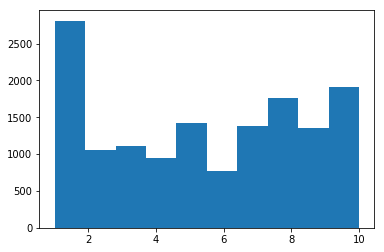

In [147]:
plt.hist(df_no_outlier.rate)
plt.show()
# i will for sure get more data from other set.

In [148]:
df_no_outlier.index = range(len(df_no_outlier))

In [149]:
df_no_outlier

,movie,body,rate,vader_pos,vader_neg,senticnet_pos,senticnet_neg,pattern_pos,pattern_neg,avg_sentiment,avg_pos,avg_neg,movie_classes,classes
0,10 Years,"Before I watched this movie, I read some revie...",10,0.237875,-0.079000,0.575030,-0.532500,0.355022,-0.500000,0.009404,0.389309,-0.370500,5.0,keep
1,10 Years,"In his directorial debut ""Ten Year"", Jamie Lin...",7,0.223286,-0.051250,0.452878,-0.453750,0.203770,-0.116250,0.043114,0.293311,-0.207083,4.0,keep
2,10 Years,'10 Years' is all about reunion of high school...,7,0.295000,-0.100000,0.502971,-0.630000,0.302272,-0.093333,0.046152,0.366747,-0.274444,4.0,keep
3,10 Years,¨Now the party can start!¨The film is about a ...,7,0.226742,-0.043609,0.548691,-0.677368,0.316566,-0.115972,0.042508,0.364000,-0.278983,4.0,keep
4,10 Years,Definitely worth seeing. I thoroughly enjoyed ...,9,0.388500,-0.013500,0.416000,-0.560000,0.260781,0.000000,0.081964,0.355094,-0.191167,5.0,keep
5,10 Years,"In ""Grosse Point Blank,"" John Cusack, a hit-ma...",5,0.105571,-0.103875,0.346324,-0.842667,0.162778,-0.111979,-0.073975,0.204891,-0.352840,3.0,keep
6,10 Years,I'll make this short. It was boring. Though it...,3,0.168714,-0.135429,0.520625,-0.651818,0.245908,-0.541667,-0.065611,0.311749,-0.442971,2.0,keep
7,10 Years,This film is about a group of high school clas...,3,0.126800,-0.135800,0.486059,-0.636667,0.356667,-0.285417,-0.014726,0.323175,-0.352628,2.0,keep
8,10 Years,I recently saw ten year at a prescreening even...,8,0.299000,0.000000,0.664125,-0.692857,0.461417,-0.050000,0.113614,0.474847,-0.247619,4.0,keep
9,10 Years,Jamie Linden wrote and directed this little fl...,4,0.097167,-0.086333,0.459571,-0.602273,0.145649,-0.078542,-0.010793,0.234129,-0.255716,2.0,keep


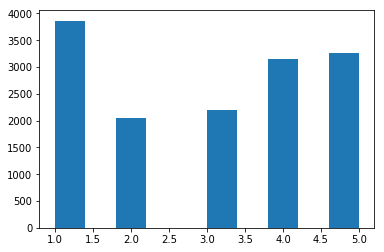

In [150]:
plt.hist(df_no_outlier.movie_classes)
plt.show()

In [151]:
# trying different method
#df1 = df[df['movie_class']!= 1]

In [152]:
training, test = train_test_split(df_no_outlier, test_size=0.2, random_state=233)
print(len(training), "train +", len(test), "test")

11622 train + 2906 test


In [153]:
x = training[['vader_pos', 'vader_neg','senticnet_pos', 'senticnet_neg', 'pattern_pos', 'pattern_neg']]
y = training.rate

In [154]:
x_test = test[['vader_pos', 'vader_neg','senticnet_pos', 'senticnet_neg', 'pattern_pos', 'pattern_neg']]
y_test = test.rate

In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
lr = LogisticRegression(solver='saga', multi_class='multinomial', random_state=20, max_iter=1000, n_jobs=-1, class_weight={1:0.35})
# the attribute of the function (default parameters)
#lr = LogisticRegression()
lr.fit(x, y)

LogisticRegression(C=1.0, class_weight={1: 0.35}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='multinomial', n_jobs=-1, penalty='l2',
          random_state=20, solver='saga', tol=0.0001, verbose=0,
          warm_start=False)

In [157]:
lr.score(x_test, y_test)

0.276668960770819

In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
conf_matrix = confusion_matrix(y_test, lr.predict(x_test), labels=[1,2,3])
conf_matrix

array([[224,  43, 126],
       [ 64,  16,  47],
       [ 43,  16,  43]])

In [160]:
from sklearn.model_selection import cross_validate

In [161]:
scores = cross_validate(lr, x, y, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )
scores

{'fit_time': array([0.20453644, 0.20757627, 0.20397806, 0.203372  , 0.20447135,
        0.20437694, 0.20356536, 0.20492864, 0.20420647, 0.20416188]),
 'score_time': array([0.00105691, 0.00084567, 0.00117302, 0.00074291, 0.00076199,
        0.00075126, 0.00075221, 0.00068712, 0.00097966, 0.00129676]),
 'test_accuracy': array([0.28791774, 0.27677806, 0.26500858, 0.28412017, 0.29345955,
        0.28103448, 0.27758621, 0.28300259, 0.29767041, 0.27571305]),
 'train_accuracy': array([0.282066  , 0.28589192, 0.28768171, 0.28201205, 0.28900574,
        0.28694322, 0.28636972, 0.284622  , 0.28567333, 0.28676541])}

In [162]:
from sklearn.ensemble import RandomForestClassifier

In [163]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [164]:
scores = cross_validate(clf, x, y, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )
scores

{'fit_time': array([0.05029869, 0.04017186, 0.03944993, 0.03938413, 0.03926229,
        0.03912306, 0.03910327, 0.0390029 , 0.03891897, 0.03924775]),
 'score_time': array([0.00159454, 0.00136638, 0.00136638, 0.00140834, 0.00133657,
        0.00135303, 0.00134754, 0.00141144, 0.00134015, 0.00137901]),
 'test_accuracy': array([0.29391602, 0.30162811, 0.30617496, 0.30472103, 0.29604131,
        0.29827586, 0.29396552, 0.30629853, 0.30025884, 0.30509939]),
 'train_accuracy': array([0.30167384, 0.30033477, 0.30327085, 0.30343311, 0.29923518,
        0.29975148, 0.30281017, 0.30000956, 0.30106088, 0.30195891])}

In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
# hyperparameter combinations test
lr = LogisticRegression(random_state=20, max_iter=10000)
param_grid = { 'C': [1, 0.5, 5, 10,100], 'tol':[0.5,1],'multi_class' : ['ovr','multinomial'], 'solver':['saga','newton-cg', 'lbfgs']}
grid = GridSearchCV(lr, param_grid=param_grid, cv=10, n_jobs=-1)

In [167]:
%%time
grid.fit(x, y)

CPU times: user 1.7 s, sys: 204 ms, total: 1.9 s
Wall time: 2min 12s


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=20, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [1, 0.5, 5, 10, 100], 'tol': [0.5, 1], 'multi_class': ['ovr', 'multinomial'], 'solver': ['saga', 'newton-cg', 'lbfgs']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [168]:
grid.best_params_

{'C': 1, 'multi_class': 'multinomial', 'solver': 'newton-cg', 'tol': 0.5}

In [169]:
lr = LogisticRegression(solver='newton-cg',tol = 0.5, multi_class='multinomial',C=1, random_state=20, max_iter=1000, n_jobs=-1, class_weight={1:0.35})
# the attribute of the function (default parameters)
#lr = LogisticRegression()
lr.fit(x, y)

LogisticRegression(C=1, class_weight={1: 0.35}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='multinomial', n_jobs=-1, penalty='l2',
          random_state=20, solver='newton-cg', tol=0.5, verbose=0,
          warm_start=False)

In [170]:
conf_matrix = confusion_matrix(y_test, lr.predict(x_test), labels=[1,2,3])
conf_matrix

array([[224,  43, 126],
       [ 64,  16,  47],
       [ 43,  16,  43]])

In [171]:
scores = cross_validate(lr, x, y, cv=10, 
                        scoring=['accuracy'],
                        return_train_score=True
                       )
scores

{'fit_time': array([0.44576097, 0.44063163, 0.44305038, 0.44119668, 0.44305778,
        0.44348311, 0.442693  , 0.4418633 , 0.44143438, 0.44027495]),
 'score_time': array([0.00093913, 0.0008595 , 0.00102139, 0.00098634, 0.00093555,
        0.0010581 , 0.00090599, 0.00089979, 0.00082493, 0.00085926]),
 'test_accuracy': array([0.29048843, 0.27592117, 0.26329331, 0.28497854, 0.29259897,
        0.28103448, 0.27758621, 0.28300259, 0.29853322, 0.27657736]),
 'train_accuracy': array([0.28254424, 0.28598757, 0.28682096, 0.28210768, 0.28843212,
        0.28713439, 0.28665647, 0.28443085, 0.28586447, 0.2865743 ])}